In [1]:
import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np

import pandas as pd

from timple.timedelta import strftimedelta

In [2]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_2022_race_analytics/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [3]:

# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)


In [4]:
#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Miami', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2



core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


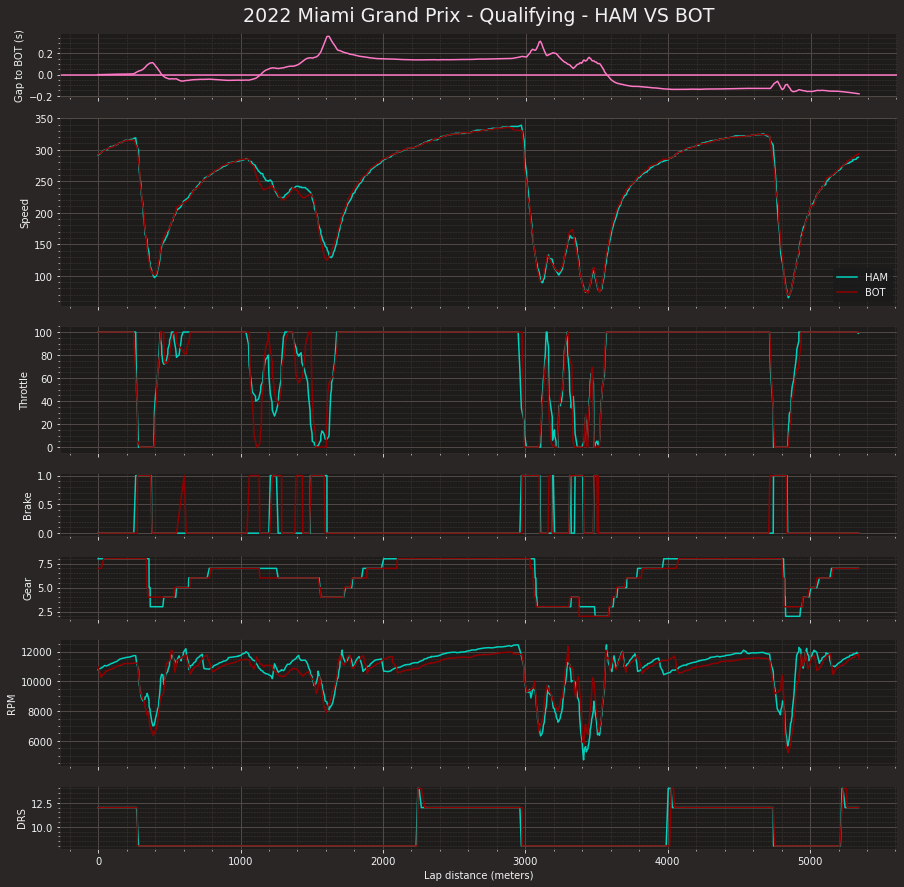

In [5]:
# Analyze Quali performance between Hamilton and Bottas, Former Teammates

driver_x, driver_y = "HAM", "BOT"

# laps can be accessed throihg the .laps object from the session .quali
lap_driver_x = quali.laps.pick_driver("HAM")
lap_driver_y = quali.laps.pick_driver("BOT")

fastest_driver_x = lap_driver_x.pick_fastest()
fastest_driver_y = lap_driver_y.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_x = fastest_driver_x.get_telemetry().add_distance()
telemetry_driver_y = fastest_driver_y.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_x = fastest_driver_x['Team']
team_driver_y = fastest_driver_y['Team']

plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_x} VS {driver_y}"
#plot_ratios = [2, 3, 2, 1, 1, 2]
plot_ratios = [1, 3, 2, 1, 1, 2,1]
plot_filename = plot_title.replace(" ", "") + ".png"

# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_x, fastest_driver_y)

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_y} (s)")

# Speed trace
ax[1].plot(telemetry_driver_x['Distance'], telemetry_driver_x['Speed'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[1].plot(telemetry_driver_y['Distance'], telemetry_driver_y['Speed'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_x['Distance'], telemetry_driver_x['Throttle'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[2].plot(telemetry_driver_y['Distance'], telemetry_driver_y['Throttle'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_x['Distance'], telemetry_driver_x['Brake'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[3].plot(telemetry_driver_y['Distance'], telemetry_driver_y['Brake'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_x['Distance'], telemetry_driver_x['nGear'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[4].plot(telemetry_driver_y['Distance'], telemetry_driver_y['nGear'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_x['Distance'], telemetry_driver_x['RPM'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[5].plot(telemetry_driver_y['Distance'], telemetry_driver_y['RPM'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_x['Distance'], telemetry_driver_x['DRS'], label=driver_x, color=ff1.plotting.team_color(team_driver_x))
ax[6].plot(telemetry_driver_y['Distance'], telemetry_driver_y['DRS'], label=driver_y, color=ff1.plotting.team_color(team_driver_y))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()


In [6]:
telemetry_driver_x

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2022-05-07 20:59:15.161,0 days 01:14:15.154000,,372.671111,0 days 00:00:00,10769,292,8,100,False,12,interpolation,-5.203926e-07,OnTrack,1832,132,249,0.000000
3,2022-05-07 20:59:15.172,0 days 01:14:15.165000,,372.671111,0 days 00:00:00.011000,10792,292,8,100,False,12,pos,1.662830e-04,OnTrack,1841,127,250,0.892222
4,2022-05-07 20:59:15.282,0 days 01:14:15.275000,,372.671111,0 days 00:00:00.121000,10838,293,8,100,False,12,car,1.841496e-03,OnTrack,1938,65,249,9.845000
5,2022-05-07 20:59:15.412,0 days 01:14:15.405000,,372.671111,0 days 00:00:00.251000,10885,295,8,100,False,12,pos,3.838115e-03,OnTrack,2062,-13,250,20.497778
6,2022-05-07 20:59:15.522,0 days 01:14:15.515000,55,372.671111,0 days 00:00:00.361000,10933,297,8,100,False,12,car,5.539845e-03,OnTrack,2155,-71,250,29.572778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2022-05-07 21:00:44.278,0 days 01:15:44.271000,55,394.750556,0 days 00:01:29.117000,11767,282,7,100,False,12,pos,9.897485e-01,OnTrack,1524,315,249,5299.132500
664,2022-05-07 21:00:44.282,0 days 01:15:44.275000,55,387.711667,0 days 00:01:29.121000,11811,284,7,100,False,12,car,9.898077e-01,OnTrack,1526,313,249,5299.448056
665,2022-05-07 21:00:44.598,0 days 01:15:44.591000,55,378.111667,0 days 00:01:29.437000,11878,285,7,100,False,12,pos,9.945093e-01,OnTrack,1703,214,249,5324.464722
666,2022-05-07 21:00:44.642,0 days 01:15:44.635000,55,368.511667,0 days 00:01:29.481000,11945,287,7,100,False,12,car,9.951685e-01,OnTrack,1737,192,249,5327.972500


In [7]:
driver_1, driver_2 = 'VER', 'LEC'

# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [8]:
# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [9]:
# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [10]:

plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2]
#plot_ratios = [1, 3, 2, 1, 1, 2,1]
plot_filename = plot_title.replace(" ", "") + ".png"

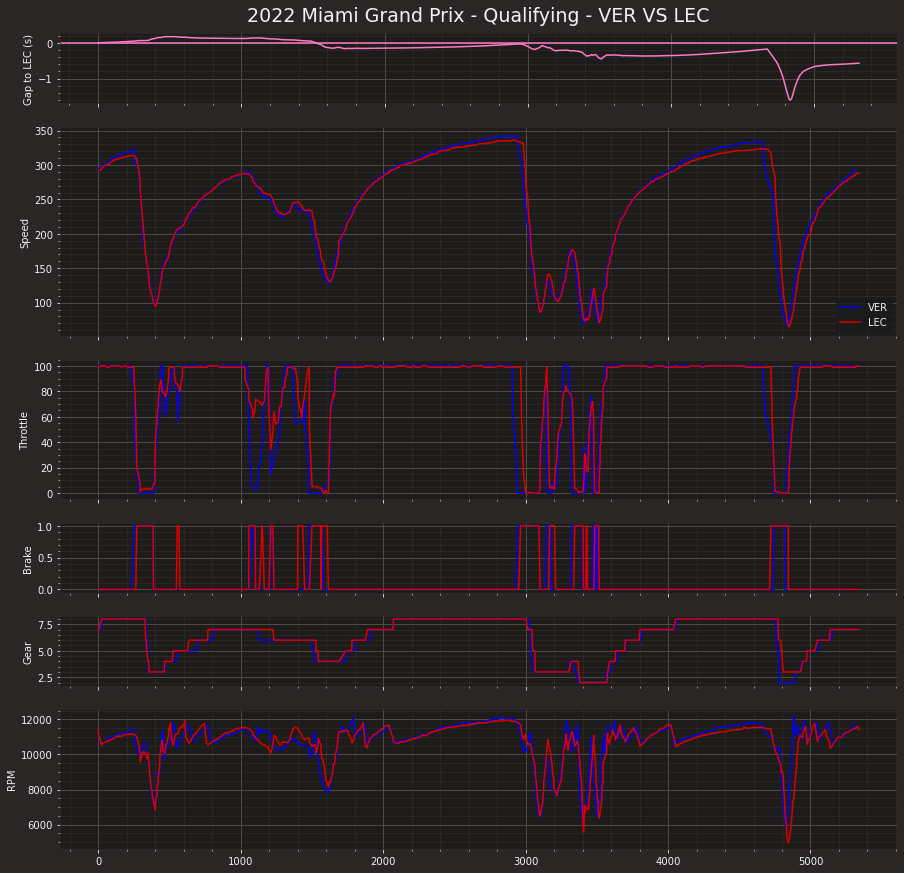

In [11]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
#fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
#ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
#ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
#ax[6].set(ylabel='DRS')
#ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()


In [12]:
year, grand_prix, session = 2022, 'Miami', 'R'

racemiami = ff1.get_session(year, grand_prix, session)
racemiami.load() # This is new with Fastf1 v.2.2

driver_1, driver_2 = 'VER', 'LEC'


# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = racemiami.laps.pick_driver(driver_1)
laps_driver_2 = racemiami.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '63', '44', '77', '31', '23', '18', '14', '22', '3', '6', '47', '20', '5', '10', '4', '24']


In [13]:
drivers = pd.unique(racemiami.laps['Driver'])
print(drivers)

['VER' 'LEC' 'SAI' 'PER' 'RUS' 'HAM' 'BOT' 'OCO' 'ALB' 'STR' 'ALO' 'TSU'
 'RIC' 'LAT' 'MSC' 'MAG' 'VET' 'GAS' 'NOR' 'ZHO']


In [14]:

#This loads the session for the Miami Grand prix Qualifiers

year, grand_prix, session = 2022, 'Miami', 'Q'

session_miami = ff1.get_session(year, grand_prix, session)
session_miami.load() # This is new with Fastf1 v.2.2

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


In [15]:
#Creagte new lap object that can be sorted by laptime and reindex them by starting position
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session_miami.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [16]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:28.796000        0 days 00:00:00
1     SAI 0 days 00:01:28.986000 0 days 00:00:00.190000
2     VER 0 days 00:01:28.991000 0 days 00:00:00.195000
3     PER 0 days 00:01:29.036000 0 days 00:00:00.240000
4     BOT 0 days 00:01:29.475000 0 days 00:00:00.679000
5     HAM 0 days 00:01:29.625000 0 days 00:00:00.829000
6     GAS 0 days 00:01:29.690000 0 days 00:00:00.894000
7     NOR 0 days 00:01:29.750000 0 days 00:00:00.954000
8     TSU 0 days 00:01:29.932000 0 days 00:00:01.136000
9     ALO 0 days 00:01:30.160000 0 days 00:00:01.364000
10    RUS 0 days 00:01:30.173000 0 days 00:00:01.377000
11    VET 0 days 00:01:30.214000 0 days 00:00:01.418000
12    RIC 0 days 00:01:30.310000 0 days 00:00:01.514000
13    MSC 0 days 00:01:30.423000 0 days 00:00:01.627000
14    STR 0 days 00:01:30.676000 0 days 00:00:01.880000
15    MAG 0 days 00:01:30.975000 0 days 00:00:02.179000
16    ZHO 0 days 00:01:31.020000 0 days 00:00:02

In [17]:
#Create a list of team colours for per lap 
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)


#Plot all the data 

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


# Add titles to the plot including a legend

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session_miami.event['EventName']} {session_miami.event.year} Race\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

AttributeError: 'NaTType' object has no attribute 'upper'

In [ ]:
racemiami.laps

In [ ]:
telemetry_driver_1

In [ ]:


driver_1, driver_2 = 'VER', 'LEC'


# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = racemiami.laps.pick_driver(driver_1)
laps_driver_2 = racemiami.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



plot_size = [15, 15]
plot_title = f"{racemiami.event.year} {racemiami.event.EventName} - {racemiami.name} - {driver_1} VS {driver_2}"
#plot_ratios = [1, 3, 2, 1, 1, 2]
plot_ratios = [1, 3, 2, 1, 1, 2,1, 2]
plot_filename = plot_title.replace(" ", "") + ".png"




# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[7].set(ylabel='Laptime', xlabel='Lap')
ax[7].legend(loc="upper center")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()



In [ ]:

laps_driver_1.T

In [ ]:
laps_driver_1.loc[laps_driver_1['LapTime'] == min(laps_driver_1['LapTime'].dropna())].T

In [ ]:
#laps_driver_1.describe



laps_driver_2.loc[laps_driver_2['LapTime'] == min(laps_driver_2['LapTime'].dropna())].T

In [ ]:
laps[['Team', 'Driver', 'LapTime']].groupby(['Team', 'Driver']).min().sort_values(['Team', 'LapTime'])


In [ ]:
laps[['Team','Driver', 'SpeedST']].groupby(['Team','Driver']).max().sort_values('SpeedST', ascending=False)


In [ ]:
year = 2022
ses = 'R'
driver = 'VER'
colormap = plt.cm.plasma


In [ ]:
year, grand_prix, session = 2022, 'Miami', 'R'

session_miami = ff1.get_session(year, grand_prix, session)
session_miami.load() # This is new with Fastf1 v.2.2



lap = session_miami.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

In [ ]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [ ]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{grand_prix} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [ ]:


#lap = session_miami.laps.pick_driver(driver).pick_fastest()

# Get telemetry data

lap = racemiami.laps.pick_fastest()
tel = lap.get_telemetry()






In [ ]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

In [ ]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)


#Create a plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {racemiami.event['EventName']} {racemiami.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


In [ ]:
plotting.setup_mpl()




lec = racemiami.laps.pick_driver('LEC').pick_fastest()
ver = racemiami.laps.pick_driver('VER').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ver, lec)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(ver['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(lec['Team']))

title = plt.suptitle(
    f"Quickest Lap Comparison Visualization\n"
    f"{racemiami.name} - {racemiami.event['EventName']} {racemiami.event.year}"
)

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Lec ahead | Ver ahead -->")
plt.show()

In [ ]:
weather_laps_miami = racemiami.weather_data
weather_laps_miami

In [ ]:


# Get laps of the drivers (LEC & VER)
laps_lec = racemiami.laps.pick_driver('LEC')#.pick_fastest()
laps_ver = racemiami.laps.pick_driver('VER')#.pick_fastest()

# We are only analyzing stint 1, so select that one
laps_lec = laps_lec.loc[laps_lec['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]


In [ ]:
laps_lec['RaceLapNumber'] = laps_lec['LapNumber'] - 1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1


In [ ]:
full_distance_ver_lec = pd.DataFrame()
summarized_distance_ver_lec = pd.DataFrame()


In [ ]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is RIC, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "2"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_lec = full_distance_ver_lec.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_lec = summarized_distance_ver_lec.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)


In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("LEC vs VER opening stint comparison")

#first subplot consists of the lap times during the opening stint
ax[0].plot(laps_lec['RaceLapNumber'], laps_lec['LapTime'], label='LEC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

#subplot will show us the average distance between Verstappen and Lecler
ax[1].plot(summarized_distance_ver_lec['Lap'], summarized_distance_ver_lec['Mean'], label='Mean', color='red')
ax[1].plot(summarized_distance_ver_lec['Lap'], summarized_distance_ver_lec['Median'], label='Median', color='grey')
ax[1].set(ylabel='Distance (meters)', xlabel='Laps')
ax[1].legend(loc="upper center")

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for a in ax.flat:
   # a.label_outer()

plt.show()

In [ ]:
# Get lap data
lap_telemetry_lec = laps_lec.loc[laps_lec['RaceLapNumber']==13].get_car_data().add_distance()
lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==13].get_car_data().add_distance()

distance_lap11 = full_distance_ver_lec.loc[full_distance_ver_lec['Lap']==11]
distance_lap12 = full_distance_ver_lec.loc[full_distance_ver_lec['Lap']==12]
distance_lap13 = full_distance_ver_lec.loc[full_distance_ver_lec['Lap']==13]
distance_lap14 = full_distance_ver_lec.loc[full_distance_ver_lec['Lap']==14]


In [ ]:


# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(9)


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")


# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')


# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[7].set(ylabel='Laptime', xlabel='Lap')
ax[7].legend(loc="upper center")

#distance of driver ahed of the other
ax[8].title.set_text("Distance to Ver (m)")
ax[8].plot(distance_lap11['Distance'], distance_lap11['DistanceToDriverAhead'], label='Lap 11', linestyle='dotted', color='grey')
ax[8].plot(distance_lap12['Distance'], distance_lap12['DistanceToDriverAhead'], label='Lap 12')
ax[8].plot(distance_lap13['Distance'], distance_lap13['DistanceToDriverAhead'], label='Lap 13', linestyle='dotted', color='white')
ax[8].plot(distance_lap14['Distance'], distance_lap14['DistanceToDriverAhead'], label='Lap 14', linestyle='dashed', color='lightgrey')
ax[8].legend(loc="lower right")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()